In [12]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [13]:
# import artist file 
file = "Resources/artistDf.csv"
artists=pd.read_csv(file)
artists.head()

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo


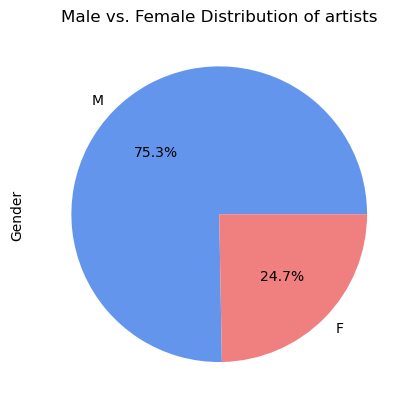

In [16]:
# what is the distribution of male v female artists? (pie chart)
artist_gender = artists['Gender'].value_counts()
colors = ['cornflowerblue','lightcoral']
artist_gender.plot(kind='pie', autopct="%.1f%%", colors=colors)
plt.title('Male vs. Female Distribution of artists')

plt.show()

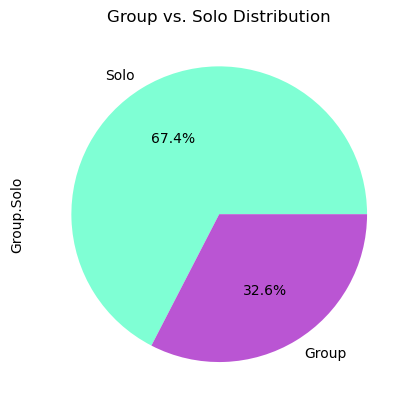

In [24]:
# distribution of group vs solo
group_solo = artists['Group.Solo'].value_counts()
colors = ['aquamarine','mediumorchid']
group_solo.plot(kind='pie', autopct="%.1f%%", colors=colors )
plt.title('Group vs. Solo Distribution')

plt.show()

In [21]:
#summary stats for number of albums
album_stats = artists.agg({'NumAlbums':['mean', 'median', 'var', 'std', 'sem']}).round(2)

album_stats

,NumAlbums
mean,11.33
median,8.00
var,135.48
std,11.64
sem,0.36


In [26]:
#summary stats for number of followers
followers_stats = artists.agg({'Followers':['mean', 'median', 'var', 'std', 'sem']}).astype(str)

followers_stats

,Followers
mean,1838602.457004831
median,571545.0
var,16082167089208.1
std,4010257.733513907
sem,124652.82062615405


In [27]:
# define a function that plots and shows linear regression
def linreg_eq (x_axis, y_axis, eq_coord, x_lab, y_lab):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    # Get regression values
    regress_values = x_axis * slope + intercept
    #line eq to plot
    line_eq = "y = " + str(round(slope,4)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq, eq_coord, fontsize=15, color="red")
    #plot, format, show
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, 'r-')
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.tight_layout()
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: 0.035728159580289


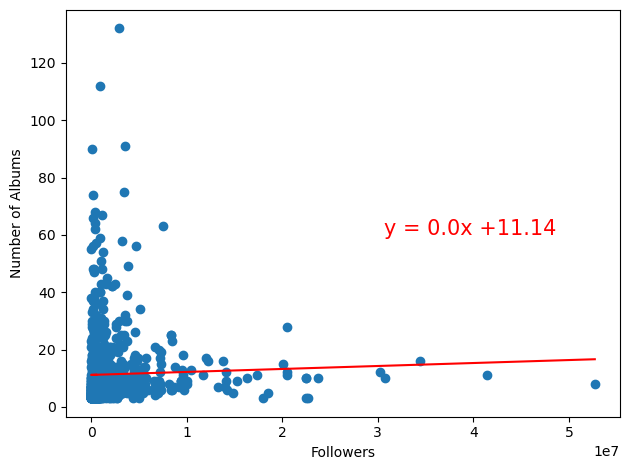

In [28]:
linreg_eq(artists['Followers'], artists['NumAlbums'],(30695247, 60), 'Followers', 'Number of Albums')

The r-value is: 0.5493816565963942


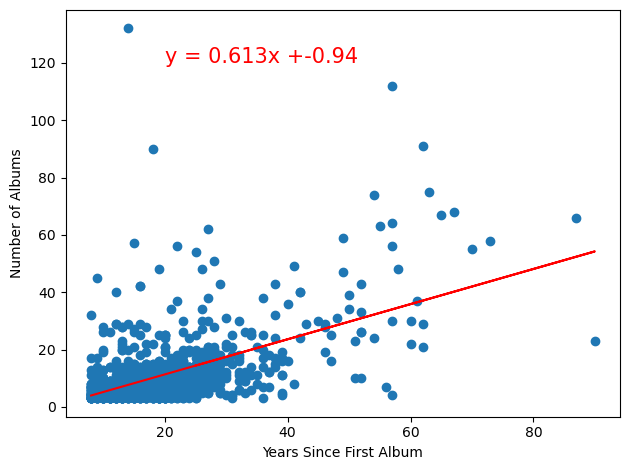

In [29]:
linreg_eq(artists['Years Since First Album'], artists['NumAlbums'],(20, 120), 'Years Since First Album', 'Number of Albums')


In [20]:
artists['Years Since First Album'] = 2019 - artists['YearFirstAlbum']
artists['Albums Per Year'] = artists['NumAlbums']/artists['Years Since First Album']
top_ten = artists.sort_values(by=['Albums Per Year'], ascending = False).head()
top_ten

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo,Years Since First Album,Albums Per Year
25,25,Gucci Mane,2904919,"atl hip hop,dirty south rap,hip hop,pop,pop ra...",132,2005,M,Solo,14,9.428571
321,321,Waka Flocka Flame,1694515,"atl hip hop,dirty south rap,gangster rap,hip h...",45,2010,M,Solo,9,5.000000
861,861,Oakenfold,124743,"big beat,progressive trance,trance",90,2001,M,Solo,18,5.000000
15,15,Meek Mill,3591329,"hip hop,philly rap,pop,pop rap,rap,southern hi...",32,2011,M,Solo,8,4.000000
598,598,Young Buck,521562,"crunk,dirty south rap,gangster rap,hardcore hi...",57,2004,M,Solo,15,3.800000


In [8]:
#import RIAA certifications file
file_2="Resources/riaaAlbumCerts_1999-2019.csv"
riaa=pd.read_csv(file_2)
riaa.head()

,Unnamed: 0,Album,Artist,Status,Label
0,0,GREATEST HITS,MARIAH CAREY,2x Multi-Platinum,LEGACY
1,1,THE REMIXES,MARIAH CAREY,Gold,COLUMBIA
2,2,VIEWS,DRAKE,6x Multi-Platinum,REPUBLIC RECORDS / CASH MONEY RECORDS / YOUNG...
3,3,MAJOR KEY,DJ KHALED,1x Platinum,WE THE BEST / EPIC
4,4,THE CHRISTMAS SESSIONS,MERCYME,Gold,FAIR TRADE SERVICES


In [31]:
# top ten artists that have albumns achieving diamond status
diamond=riaa[riaa["Status"].str.contains("Diamond", na=False)]
diamond_artists=diamond["Artist"].value_counts()
plt_d_artists = diamond_artists.head(10)
plt_d_artists

SHAKIRA           2
ADELE             2
EMINEM            2
JUANES            1
USHER             1
CREED             1
SHANIA TWAIN      1
BRITNEY SPEARS    1
NORAH JONES       1
OUTKAST           1
Name: Artist, dtype: int64

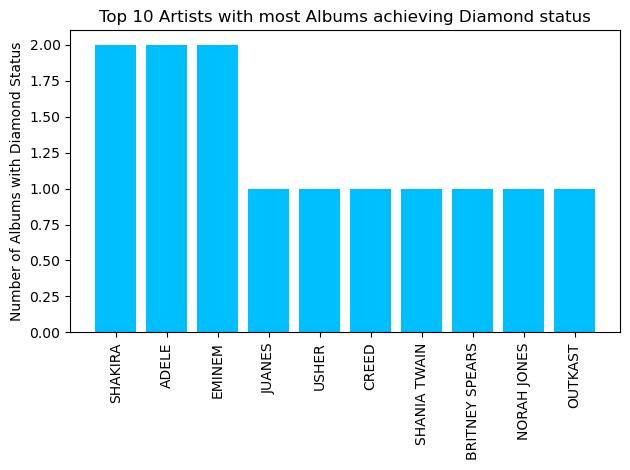

In [32]:
# bar chart for artists achieving diamond status
plt.bar(plt_d_artists.index.values, plt_d_artists.values, facecolor = 'deepskyblue')
plt.ylabel('Number of Albums with Diamond Status')
plt.xticks(rotation= 'vertical')
plt.title('Top 10 Artists with most Albums achieving Diamond status')
plt.tight_layout()
plt.show()

In [33]:
# which labels have achieved diamond status?
diamond_labels = diamond["Label"].value_counts()
plt_d_labels = diamond_labels.head(10)
plt_d_labels

 SONY LATIN                   3
 UNIVERSAL MUSIC LATINO       2
 AFTERMATH  /  INTERSCOPE     2
 SO SO DEF                    2
 BIG MACHINE RECORDS, INC.    1
 COLUMBIA/XL                  1
 WARNER BROS RECORDS          1
 ROADRUNNER                   1
 COLUMBIA                     1
 REPUBLIC RECORDS             1
Name: Label, dtype: int64

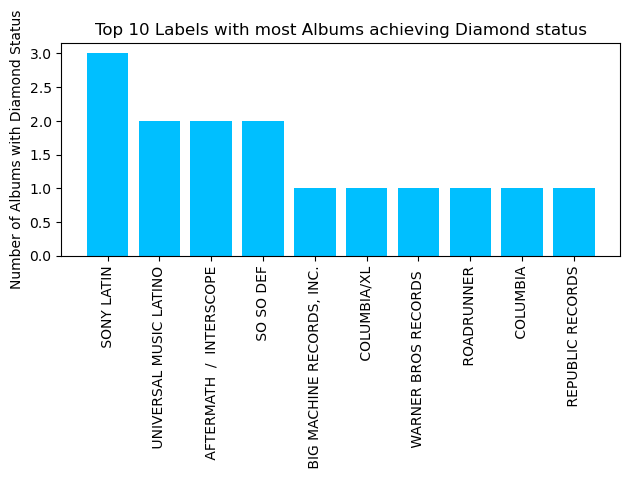

In [35]:
#bar chart for artists achieving diamond
plt.bar(plt_d_labels.index.values, plt_d_labels.values,  facecolor = 'deepskyblue')
plt.ylabel('Number of Albums with Diamond Status')
plt.xticks(rotation= 'vertical')
plt.title('Top 10 Labels with most Albums achieving Diamond status')
plt.tight_layout()
plt.show()

In [93]:
# Top 5 artists by followers 
#show only artist and followers column 
followers=artists[["Artist","Followers"]]
followers

,Artist,Followers
0,Ed Sheeran,52698756
1,Justin Bieber,30711450
2,Jonas Brothers,3069527
3,Drake,41420478
4,Chris Brown,9676862
...,...,...
1030,Dwight Yoakam,284597
1031,Jordan Knight,47229
1032,Lila McCann,42444
1033,Everlast,200550


In [8]:
#sort the followers column from greatest to smallest 
followers=followers.sort_values(["Followers"],ascending=False)
followers

,Artist,Followers
0,Ed Sheeran,52698756
3,Drake,41420478
113,Rihanna,34436700
1,Justin Bieber,30711450
54,Eminem,30220119
...,...,...
888,Toya,2425
652,Jeannie Ortega,1442
972,Eric Heatherly,1093
1029,Terry Dexter,790


In [9]:
#display top 5 artists by followers and reset index
followers=followers.head()
followers.reset_index(drop=True,inplace=True)
followers=followers.set_index(["Artist"])
followers

,Followers
Artist,
Ed Sheeran,52698756
Drake,41420478
Rihanna,34436700
Justin Bieber,30711450
Eminem,30220119


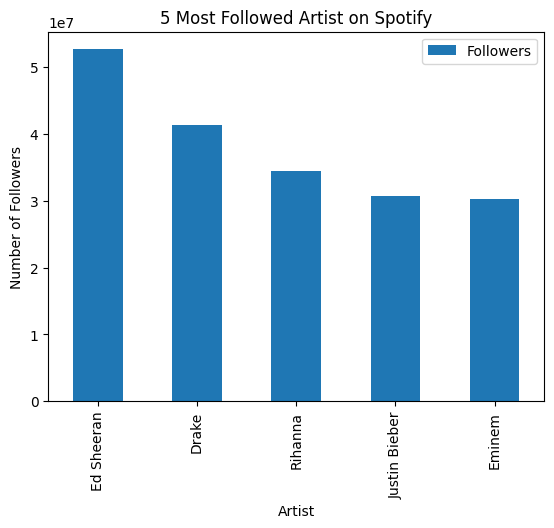

In [10]:
#create bar chart
followers.plot(kind="bar",title="5 Most Followed Artist on Spotify", xlabel="Artist", ylabel="Number of Followers" )
plt.show()

In [11]:
# Which artist has released the most albums 
#look only at the artist and NumAlbum colums 
most_album=artists[["Artist","NumAlbums"]]
most_album

,Artist,NumAlbums
0,Ed Sheeran,8
1,Justin Bieber,10
2,Jonas Brothers,10
3,Drake,11
4,Chris Brown,6
...,...,...
1030,Dwight Yoakam,25
1031,Jordan Knight,4
1032,Lila McCann,4
1033,Everlast,11


In [12]:
#sort the dataframe by Number of albums from greatest to least 
most_album=most_album.sort_values(["NumAlbums"],ascending=False)
most_album

,Artist,NumAlbums
25,Gucci Mane,132
682,Willie Nelson,112
245,Cash Cash,91
861,Oakenfold,90
67,Elvis Presley,75
...,...,...
680,The Notorious B.I.G.,3
356,Steve Holy,3
955,Changing Faces,3
812,Fefe Dobson,3


In [13]:
#reset the index
most_album.reset_index(drop=True,inplace=True)
most_album

,Artist,NumAlbums
0,Gucci Mane,132
1,Willie Nelson,112
2,Cash Cash,91
3,Oakenfold,90
4,Elvis Presley,75
...,...,...
1030,The Notorious B.I.G.,3
1031,Steve Holy,3
1032,Changing Faces,3
1033,Fefe Dobson,3


In [14]:
#display the artist with the most albums 
name_most_album=most_album.iloc[[0]]
name_most_album

,Artist,NumAlbums
0,Gucci Mane,132


In [15]:
#which artist relseased the first album
year=artists[["Artist","YearFirstAlbum"]]
year

,Artist,YearFirstAlbum
0,Ed Sheeran,2011
1,Justin Bieber,2009
2,Jonas Brothers,2006
3,Drake,2010
4,Chris Brown,2005
...,...,...
1030,Dwight Yoakam,1985
1031,Jordan Knight,1999
1032,Lila McCann,1997
1033,Everlast,1990


In [16]:
#sort by eariest year release 
year=year.sort_values(["YearFirstAlbum"])
year

,Artist,YearFirstAlbum
63,Gene Autry,1929
66,Bing Crosby,1932
71,Frank Sinatra,1946
58,Burl Ives,1949
361,Tony Bennett,1952
...,...,...
279,Q-Tip,2011
43,Scotty McCreery,2011
202,Action Bronson,2011
214,Big,2011


In [17]:
#reset index
year.reset_index(drop=True, inplace=True)
year

,Artist,YearFirstAlbum
0,Gene Autry,1929
1,Bing Crosby,1932
2,Frank Sinatra,1946
3,Burl Ives,1949
4,Tony Bennett,1952
...,...,...
1030,Q-Tip,2011
1031,Scotty McCreery,2011
1032,Action Bronson,2011
1033,Big,2011


In [18]:
#distplay the artist 
year_dropped=year.iloc[[0]]
year_dropped

,Artist,YearFirstAlbum
0,Gene Autry,1929


In [19]:
#plot the first 5 albums dropped by year
df=year.set_index(['Artist'])
df=df.head()
df

,YearFirstAlbum
Artist,
Gene Autry,1929
Bing Crosby,1932
Frank Sinatra,1946
Burl Ives,1949
Tony Bennett,1952


In [20]:
#drop unwanted columns
riaa=riaa.drop(["Unnamed: 0"],axis=1)
riaa

,Album,Artist,Status,Label
0,GREATEST HITS,MARIAH CAREY,2x Multi-Platinum,LEGACY
1,THE REMIXES,MARIAH CAREY,Gold,COLUMBIA
2,VIEWS,DRAKE,6x Multi-Platinum,REPUBLIC RECORDS / CASH MONEY RECORDS / YOUNG...
3,MAJOR KEY,DJ KHALED,1x Platinum,WE THE BEST / EPIC
4,THE CHRISTMAS SESSIONS,MERCYME,Gold,FAIR TRADE SERVICES
...,...,...,...,...
1726,THE DISTANCE TO HERE,LIVE,1x Platinum,RADIOACTIVE
1727,I WANT IT ALL,WARREN G,Gold,RESTLESS/G-FUNK
1728,TO VENUS AND BACK,TORI AMOS,1x Platinum,ATLANTIC
1729,GUERILLA WARFARE,HOT BOYS,1x Platinum,CASH MONEY


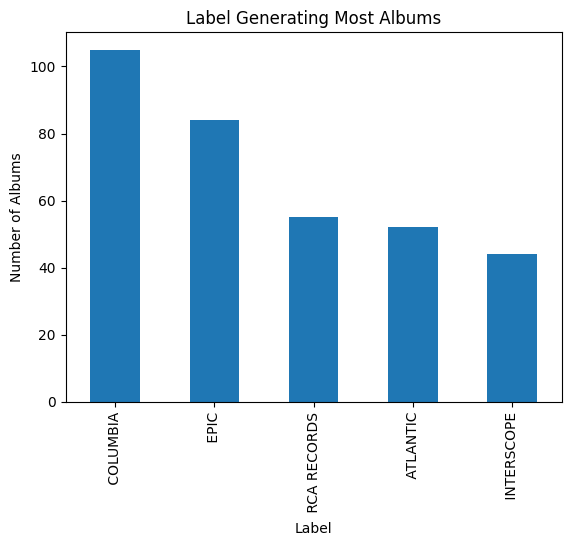

In [21]:
#Label with most albums released
label=riaa["Label"].value_counts()
bar=label.head()
bar.plot(kind="bar", title="Label Generating Most Albums", xlabel="Label", ylabel="Number of Albums")
plt.show()

In [31]:
index=riaa.set_index(["Album"])
index
test=index["Status"]=="Gold"
test
df=index.loc[test[:]]
df

,Artist,Status,Label
Album,,,
THE REMIXES,MARIAH CAREY,Gold,COLUMBIA
THE CHRISTMAS SESSIONS,MERCYME,Gold,FAIR TRADE SERVICES
BAPTIZED,DAUGHTRY,Gold,RCA
TREMAINE: THE ALBUM,TREY SONGZ,Gold,ATLANTIC RECORDS
GRAFFITI,CHRIS BROWN,Gold,RCA
...,...,...,...
MIDNITE VULTURES,BECK,Gold,GEFFEN
RAVE UN2 THE JOY FANTASTIC,PRINCE,Gold,ARISTA
NIGGA PLEASE,OL' DIRTY BASTARD,Gold,ELEKTRA


In [35]:
df['Label'].unique()

array([' COLUMBIA', ' FAIR TRADE SERVICES', ' RCA', ' ATLANTIC RECORDS',
       ' JIVE', ' CHRIS BROWN ENTERTAINMENT / RCA',
       ' CAPITOL RECORDS NASHVILLE',
       ' BREAD WINNERS ASSOCIATION / ATLANTIC RECORDS',
       ' WE THE BEST / EPIC', ' ASTRALWERKS', ' MCA NASHVILLE',
       ' MOTOWN RECORDS', ' WARNER BROS. RECORDS', ' ROSTRUM  ',
       ' WARNER BROS RECORDS ', ' HOLLYWOOD RECORDS', ' REPUBLIC RECORDS',
       ' BYSTORM/RCA', ' UNIVERSAL MUSIC ENTERPRISES',
       ' INTERSCOPE RECORDS', ' FUELED BY RAMEN', ' THE VALORY MUSIC CO',
       ' EPIC', ' XL RECORDINGS', ' RCA NASHVILLE',
       ' SHADY / AFTERMATH / INTERSCOPE',
       ' G.O.O.D MUSIC / DEF JAM RECORDINGS',
       ' BLUE CHAIR RECORDS / COLUMBIA NASHVILLE', ' BROKEN BOW RECORDS',
       ' RAWKUS', ' TOP DAWG ENTERTAINMENT / INTERSCOPE',
       ' DANGERBIRD RECORDS', ' CAPITOL RECORDS', ' ROSTRUM RECORDS',
       ' RCA RECORDS', ' EPIC RECORDS', ' SBME STRATEGIC MARKETING GROUP',
       ' BMG HERITAGE', ' RCA / 

In [47]:
df['Label'].value_counts()

 COLUMBIA                                    51
 EPIC                                        40
 ATLANTIC                                    25
 GEFFEN                                      24
 RCA RECORDS                                 21
                                             ..
 HOMEGROWN / ATLANTIC RECORDS                 1
 MR. 305, DISTRIBUTED BY SONY MUSIC LATIN     1
 PPK                                          1
 COLUMBIA / NICKELODEON JV                    1
 RESTLESS/G-FUNK                              1
Name: Label, Length: 224, dtype: int64

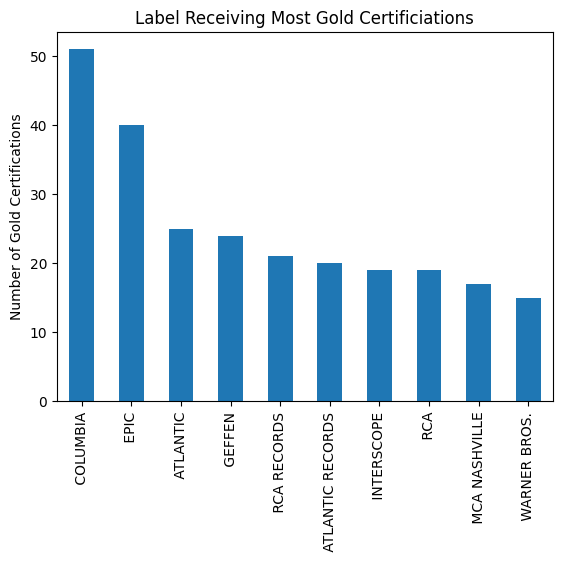

In [53]:
fig, ax = plt.subplots()
df['Label'].value_counts().head(10).plot(ax=ax, kind='bar', title="Label Receiving Most Gold Certificiations", ylabel="Number of Gold Certifications")
plt.show()

In [43]:
df['Artist'].value_counts()

ELVIS PRESLEY      10
MERCYME             7
LIL WAYNE           6
GEORGE STRAIT       6
JOSH GROBAN         5
                   ..
HINDER              1
ENYA                1
THE KILLERS         1
DAVID ARCHULETA     1
WARREN G            1
Name: Artist, Length: 473, dtype: int64

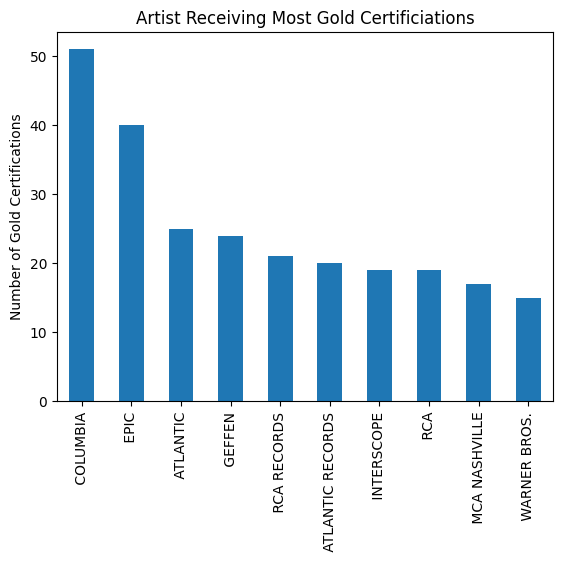

In [54]:
fig, ax = plt.subplots()
df['Label'].value_counts().head(10).plot(ax=ax, kind='bar', title="Artist Receiving Most Gold Certificiations", ylabel="Number of Gold Certifications")
plt.show()

In [38]:
df['Artist'].unique()

array(['MARIAH CAREY', 'MERCYME', 'DAUGHTRY', 'TREY SONGZ', 'CHRIS BROWN',
       'CAGE THE ELEPHANT', 'KEITH URBAN', 'KEVIN GATES', 'JOHN MAYER',
       'DJ KHALED', 'WIZ KHALIFA', 'EMPIRE OF THE SUN', 'JOSH TURNER',
       'ASHER ROTH', 'GOO GOO DOLLS', 'MAC MILLER', 'CHRISTINA PERRI',
       'QUEEN', 'LUKE BRYAN', 'LINKIN PARK', 'KID CUDI', 'MIGUEL',
       'SOLANGE', 'ELTON JOHN', 'KEANE', 'TWENTY ONE PILOTS', 'KESHA',
       'BRANTLEY GILBERT', 'YO GOTTI', 'SKILLET', 'RADIOHEAD',
       'CARRIE UNDERWOOD', 'SARA EVANS', 'EMINEM', 'KANYE WEST',
       'PORTUGAL. THE MAN', 'KENNY CHESNEY', 'JASON ALDEAN',
       'TALIB KWELI', 'CHRISTINA AGUILERA', 'SCHOOLBOY Q',
       'SILVERSUN PICKUPS', 'LIZ PHAIR', 'MEEK MILL', 'AVRIL LAVIGNE',
       'GUCCI MANE', 'ELVIS PRESLEY', 'JUSTIN TIMBERLAKE',
       'RODNEY ATKINS', 'PANIC! AT THE DISCO', 'SHINEDOWN',
       'BRITNEY SPEARS', 'TYLER THE CREATOR', 'NEW BOYZ',
       'WHITNEY HOUSTON', '10 YEARS', 'IDINA MENZEL', 'BIG SEAN',
       'FRE

In [23]:
df.set_index(["Artist"])

,Album,Status
Artist,,
MARIAH CAREY,THE REMIXES,Gold
MERCYME,THE CHRISTMAS SESSIONS,Gold
DAUGHTRY,BAPTIZED,Gold
TREY SONGZ,TREMAINE: THE ALBUM,Gold
CHRIS BROWN,GRAFFITI,Gold
...,...,...
BECK,MIDNITE VULTURES,Gold
PRINCE,RAVE UN2 THE JOY FANTASTIC,Gold
OL' DIRTY BASTARD,NIGGA PLEASE,Gold
